### Importing Libraries

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline 
pd.set_option('display.max_columns',500)

In [2]:
tweets_df = pd.read_csv('vaccine_tweets2.csv')

In [3]:
tweets_df.head(2) 

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,tweet,language,mentions,urls,photos,replies_count,retweets_count,likes_count,hashtags,cashtags,link,retweet,quote_url,video,thumbnail,near,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,1388860165538021376,1388860165538021376,2021-05-02 19:47:21 India Standard Time,2021-05-02,19:47:21,530,1243560408025198593,meidastouch,MeidasTouch.com,NaN,"Know your party platforms! Democrats: Jobs, C...",en,[],[],[],44,660,1967,[],[],https://twitter.com/MeidasTouch/status/1388860...,False,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
1,1388841616866115589,1388841616866115589,2021-05-02 18:33:39 India Standard Time,2021-05-02,18:33:39,530,245687754,pti_news,Press Trust of India,NaN,CM Mamata Banerjee asks Centre to provide free...,en,[],[],[],128,537,3888,[],[],https://twitter.com/PTI_News/status/1388841616...,False,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN


In [4]:
tweets_df.shape

(25774, 36)

In [5]:
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25774 entries, 0 to 25773
Data columns (total 36 columns):
id                 25774 non-null int64
conversation_id    25774 non-null int64
created_at         25774 non-null object
date               25774 non-null object
time               25774 non-null object
timezone           25774 non-null int64
user_id            25774 non-null int64
username           25774 non-null object
name               25774 non-null object
place              3 non-null object
tweet              25774 non-null object
language           25774 non-null object
mentions           25774 non-null object
urls               25774 non-null object
photos             25774 non-null object
replies_count      25774 non-null int64
retweets_count     25774 non-null int64
likes_count        25774 non-null int64
hashtags           25774 non-null object
cashtags           25774 non-null object
link               25774 non-null object
retweet            25774 non-null bool
qu

In [6]:
tweets_df.nunique()

id                 25774
conversation_id    24841
created_at         25643
date                 933
time               21661
timezone               1
user_id            10161
username           10161
name               10041
place                  3
tweet              25731
language              28
mentions            1414
urls                2823
photos              3853
replies_count       2320
retweets_count      5320
likes_count        11115
hashtags            1418
cashtags               6
link               25774
retweet                1
quote_url           1969
video                  2
thumbnail           5132
near                   0
geo                    0
source                 0
user_rt_id             0
user_rt                0
retweet_id             0
reply_to             590
retweet_date           0
translate              0
trans_src              0
trans_dest             0
dtype: int64

#### Initial Observation
- Total tweets Successfully collected 24744 Tweets
- Total number of rows to be worked on 24744
- 10 columns with all null value
- 3 column with more than 80% null values


### Checking for nytimes / cnn / usnews value counts

####  nytimes (49.9m followers) has only 86 tweets regarding Vaccine

In [7]:
df_nytimestweets = tweets_df[tweets_df['username'] == 'nytimes']
df_nytimestweets['username'].value_counts()

nytimes    86
Name: username, dtype: int64

####  most popular tweeter news account CNN Breaking News (60.2m followers) has only 47 tweets regarding Vaccine

In [8]:
df_cnntweets = tweets_df[tweets_df['username'] == 'cnnbrk']
df_cnntweets['username'].value_counts()

cnnbrk    47
Name: username, dtype: int64

####  usnews (158.1k followers) has no tweets regarding Vaccine

In [9]:
df_usnewstweets = tweets_df[tweets_df['username'] == 'usnews']
df_usnewstweets['username'].value_counts() 

Series([], Name: username, dtype: int64)

### Dropping columns with more than 60% null value

In [10]:
tweets_df = tweets_df.loc[:, tweets_df.isnull().mean() < .6]

#### Checking for users with number of tweets

In [11]:
tweets_df['username'].value_counts()

kylegriffin1      197
spectatorindex    189
drericding        162
aslavitt          138
ani               117
                 ... 
clarefm             1
sw_holocron         1
drvivians           1
ahuozyurt           1
gigz                1
Name: username, Length: 10161, dtype: int64

#### number of languages tweets

In [12]:
tweets_df['language'].value_counts()

en     25027
tl       148
fr       139
hi       116
ja        72
in        54
und       44
pt        41
es        34
it        28
cs        12
de         8
et         7
ca         7
th         7
ro         5
ht         5
da         4
ar         3
tr         3
ta         2
fi         2
ur         1
sv         1
lt         1
ko         1
nl         1
fa         1
Name: language, dtype: int64

In [13]:
tweets_df['cashtags'].value_counts()

[]                                       25769
['pfe']                                      1
['pfe', 'mrna', 'nvax', 'azn', 'jnj']        1
['pfe', 'mrna']                              1
['zm']                                       1
['mrna']                                     1
Name: cashtags, dtype: int64

In [14]:
tweets_df['video'].value_counts() 

0    20555
1     5219
Name: video, dtype: int64

In [15]:
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25774 entries, 0 to 25773
Data columns (total 23 columns):
id                 25774 non-null int64
conversation_id    25774 non-null int64
created_at         25774 non-null object
date               25774 non-null object
time               25774 non-null object
timezone           25774 non-null int64
user_id            25774 non-null int64
username           25774 non-null object
name               25774 non-null object
tweet              25774 non-null object
language           25774 non-null object
mentions           25774 non-null object
urls               25774 non-null object
photos             25774 non-null object
replies_count      25774 non-null int64
retweets_count     25774 non-null int64
likes_count        25774 non-null int64
hashtags           25774 non-null object
cashtags           25774 non-null object
link               25774 non-null object
retweet            25774 non-null bool
video              25774 non-null int64

### Checking dates and converting it into datetime

In [16]:
tweets_df['date'].min()

'2013-02-17'

In [17]:
tweets_df['date'].max()

'2021-05-02'

In [18]:
tweets_df['date']= pd.to_datetime(tweets_df['date']) 

In [19]:
tweets_df['year'] = tweets_df['date'].dt.year
tweets_df['month'] = tweets_df['date'].dt.month

In [20]:
tweets_df['year'].value_counts() 

2021    15209
2020     9725
2019      542
2018      186
2017       69
2015       18
2016       14
2014        9
2013        2
Name: year, dtype: int64

#### Observation
- Most of the tweets are from 2020 onwards so we can make the assumption , the talk of vaccine became more popular since COVID19 started

#### Selecting tweets after 1/1/2020

In [21]:
ts = pd.to_datetime('1/1/2020')
tweets_df_r = tweets_df.loc[tweets_df.date >= ts,: ] 

In [22]:
tweets_df_r.shape

(24934, 25)

In [23]:
tweets_df_r.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24934 entries, 0 to 24933
Data columns (total 25 columns):
id                 24934 non-null int64
conversation_id    24934 non-null int64
created_at         24934 non-null object
date               24934 non-null datetime64[ns]
time               24934 non-null object
timezone           24934 non-null int64
user_id            24934 non-null int64
username           24934 non-null object
name               24934 non-null object
tweet              24934 non-null object
language           24934 non-null object
mentions           24934 non-null object
urls               24934 non-null object
photos             24934 non-null object
replies_count      24934 non-null int64
retweets_count     24934 non-null int64
likes_count        24934 non-null int64
hashtags           24934 non-null object
cashtags           24934 non-null object
link               24934 non-null object
retweet            24934 non-null bool
video              24934 non-nu

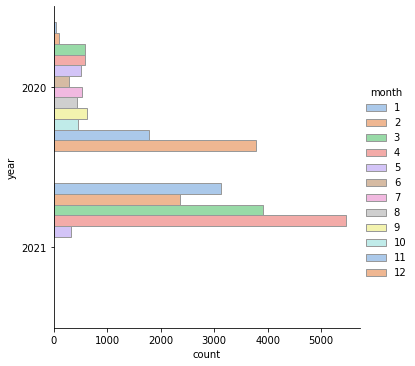

In [24]:
sns.catplot(y="year", hue="month", kind="count",
            palette="pastel", edgecolor=".6",
            data=tweets_df_r)

In [25]:
tweets_df_r.groupby(['year','month']).size().unstack(fill_value=0)

month,1,2,3,4,5,6,7,8,9,10,11,12
year,,,,,,,,,,,,
2020,42,110,580,596,505,280,539,435,619,456,1785,3778
2021,3124,2369,3923,5463,330,0,0,0,0,0,0,0


#### Observation
- Clearly the number of tweets with regards to vaccine has been the highest month of April 2021
- Jan 2021 & Feb 2021 had a dip in the number of tweets after taking off in Dec 2020

### Creating a subset and working on it

In [26]:
subset = ['date', 'tweet', 'month','year']
tweets_df_r1 = tweets_df_r.loc[:, subset] 
tweets_df_r1.head() 

,date,tweet,month,year
0,2021-05-02,"Know your party platforms! Democrats: Jobs, C...",5,2021
1,2021-05-02,CM Mamata Banerjee asks Centre to provide free...,5,2021
2,2021-05-02,West Bengal Government needs to be very carefu...,5,2021
3,2021-05-02,Crediting Boris Johnson with beating Covid is ...,5,2021
4,2021-05-02,I got my second Pfizer vaccine shot. I didn’t ...,5,2021


In [27]:
tweets_df_r1.shape

(24934, 4)

### Checking the word frequency

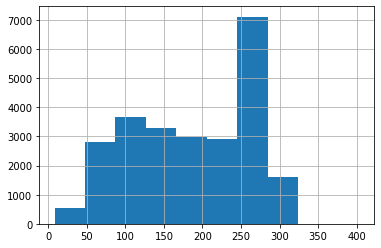

In [28]:
tweets_df_r1['tweet'].str.len().hist() 

#### Observation
- The histogram shows that the tweets range from **5 to 320 characters** and generally, it is between **50 to 250 characters.**

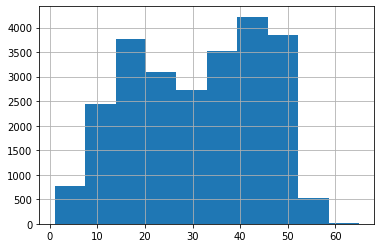

In [29]:
tweets_df_r1['tweet'].str.split().\
    map(lambda x: len(x)).\
    hist() 

#### Observation
The histogram shows that the tweets at the **number of word level** range from 1 to 58 words and generally, it is between 10 to 50 words.

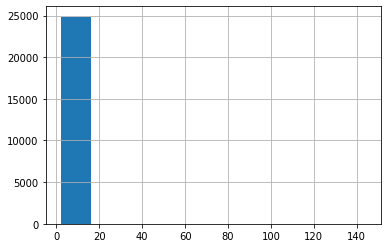

In [30]:
tweets_df_r1['tweet'].str.split().\
   apply(lambda x : [len(i) for i in x]). \
   map(lambda x: np.mean(x)).hist()

#### Observation
The histogram shows **Average number of word** us 2-18

### NLTK

In [31]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from nltk.probability import FreqDist
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

### Adding sentiment through TextBlob
- **Polarity** is a float that lies between [-1,1], -1 indicates negative sentiment and +1 indicates positive sentiments. 
- **Subjectivity** is also a float which lies in the range of [0,1]. Subjective sentences generally refer to personal opinion, emotion, or judgment.It rather quantifies the amount of personal opinion and factual information contained in the text. The higher subjectivity means that the text contains personal opinion rather than factual information

In [32]:
from textblob import TextBlob

In [33]:
def clean_tweet(tweets_df_r1, tweet):
        '''
        Utility function to clean tweet text by removing links, special characters
        using simple regex statements.
        '''
        return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ","`", tweet).split())

In [34]:
def sentiment_calc(tweet):
    try:
        return TextBlob(tweet).sentiment
    except:
        return None
    
tweets_df_r1['sentiment'] = tweets_df_r1['tweet'].apply(sentiment_calc)

In [35]:
tweets_df_r2 = tweets_df_r1
sentiment_series = tweets_df_r2['sentiment'].tolist()
columns = ['polarity', 'subjectivity']
tweets_df_r2 = pd.DataFrame(sentiment_series, columns=columns, index=tweets_df_r2.index)

In [36]:
tweets_df_r2.head()

,polarity,subjectivity
0,0.200000,0.400000
1,0.400000,0.800000
2,-0.418333,0.791667
3,-0.068519,0.479630
4,0.000000,0.000000


In [37]:
tweets_df_r2 = tweets_df_r1
sentiment_series = tweets_df_r2['sentiment'].tolist()
columns = ['polarity', 'subjectivity']
tweets_df_r2 = pd.DataFrame(sentiment_series, columns=columns, index=tweets_df_r2.index)

tweets_df_r2.head()

,polarity,subjectivity
0,0.200000,0.400000
1,0.400000,0.800000
2,-0.418333,0.791667
3,-0.068519,0.479630
4,0.000000,0.000000


In [38]:
tweets_df_r2.shape

(24934, 2)

In [39]:
tweets_df_r1['polarity'] = tweets_df_r2['polarity']
tweets_df_r1['subjectivity'] = tweets_df_r2['subjectivity'] 

In [40]:
# create a list of our conditions
conditions = [
    (tweets_df_r1['polarity'] > 0),
    (tweets_df_r1['polarity'] == 0),
    (tweets_df_r1['polarity'] < 0)
    ]

# create a list of the values we want to assign for each condition
values = ['positive', 'neutral', 'negative']

# create a new column and use np.select to assign values to it using our lists as arguments
tweets_df_r1['sentiment1'] = np.select(conditions, values)

# display updated DataFrame
tweets_df_r1.head()

,date,tweet,month,year,sentiment,polarity,subjectivity,sentiment1
0,2021-05-02,"Know your party platforms! Democrats: Jobs, C...",5,2021,"(0.2, 0.4)",0.200000,0.400000,positive
1,2021-05-02,CM Mamata Banerjee asks Centre to provide free...,5,2021,"(0.4, 0.8)",0.400000,0.800000,positive
2,2021-05-02,West Bengal Government needs to be very carefu...,5,2021,"(-0.4183333333333333, 0.7916666666666666)",-0.418333,0.791667,negative
3,2021-05-02,Crediting Boris Johnson with beating Covid is ...,5,2021,"(-0.06851851851851852, 0.47962962962962963)",-0.068519,0.479630,negative
4,2021-05-02,I got my second Pfizer vaccine shot. I didn’t ...,5,2021,"(0.0, 0.0)",0.000000,0.000000,neutral


In [41]:
# create a list of our conditions
conditions = [
    (tweets_df_r1['subjectivity'] < 0.5),
    (tweets_df_r1['subjectivity'] >= 0.5)
    ]

# create a list of the values we want to assign for each condition
values = ['objective', 'subjective']

# create a new column and use np.select to assign values to it using our lists as arguments
tweets_df_r1['sentiment2'] = np.select(conditions, values)

# display updated DataFrame
tweets_df_r1.head() 

,date,tweet,month,year,sentiment,polarity,subjectivity,sentiment1,sentiment2
0,2021-05-02,"Know your party platforms! Democrats: Jobs, C...",5,2021,"(0.2, 0.4)",0.200000,0.400000,positive,objective
1,2021-05-02,CM Mamata Banerjee asks Centre to provide free...,5,2021,"(0.4, 0.8)",0.400000,0.800000,positive,subjective
2,2021-05-02,West Bengal Government needs to be very carefu...,5,2021,"(-0.4183333333333333, 0.7916666666666666)",-0.418333,0.791667,negative,subjective
3,2021-05-02,Crediting Boris Johnson with beating Covid is ...,5,2021,"(-0.06851851851851852, 0.47962962962962963)",-0.068519,0.479630,negative,objective
4,2021-05-02,I got my second Pfizer vaccine shot. I didn’t ...,5,2021,"(0.0, 0.0)",0.000000,0.000000,neutral,objective


In [42]:
tweets_df_r1['sentiment1'].value_counts()

positive    13100
neutral      6736
negative     5098
Name: sentiment1, dtype: int64

In [43]:
tweets_df_r1['sentiment2'].value_counts()

objective     15508
subjective     9426
Name: sentiment2, dtype: int64

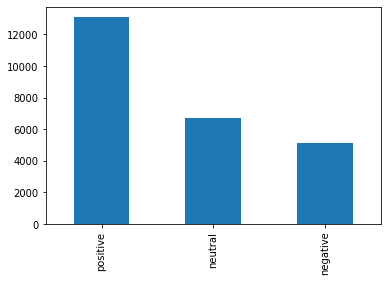

In [44]:
tweets_df_r1['sentiment1'].value_counts().plot.bar() 

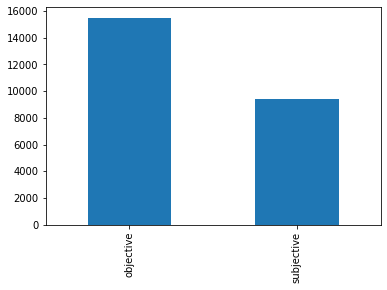

In [45]:
tweets_df_r1['sentiment2'].value_counts().plot.bar() 

In [46]:
tweets_df_r1.groupby(['year','month','sentiment2','sentiment1']).size().unstack(fill_value=0)

sentiment1             negative  neutral  positive
year month sentiment2                             
2020 1     objective          4       13        11
           subjective         7        0         7
     2     objective         10       24        26
           subjective        12        4        34
     3     objective         57      129       163
           subjective        67       12       152
     4     objective         65      126       170
           subjective        72       13       150
     5     objective         50       97       142
           subjective        56        9       151
     6     objective         28       63        68
           subjective        45        8        68
     7     objective         54      123       168
           subjective        46       13       135
     8     objective         38      117       119
           subjective        48       14        99
     9     objective         62      156       182
           subjective        68       17       134
     10    objective         45      117       125
           subjective        40       11       118
     11    objective        127      369       478
           subjective       166       42       603
     12    objective        365     1039      1077
           subjective       361       75       861
2021 1     objective        338      735       813
           subjective       356       71       811
     2     objective        260      552       661
           subjective       216       68       612
     3     objective        401     1000      1120
           subjective       393       85       924
     4     objective        596     1398      1419
           subjective       573      152      1325
     5     objective         36       79        93
           subjective        36        5        81

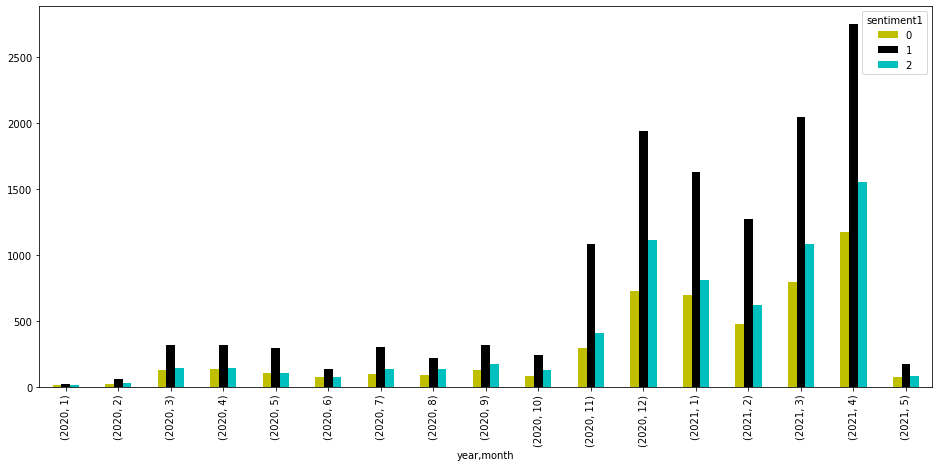

In [132]:
tweets_df_r1.groupby(['year','month','sentiment1']).sentiment1.count().unstack().plot(figsize=(16, 7),kind='bar', legend=True, color=['y', 'k', 'c'])

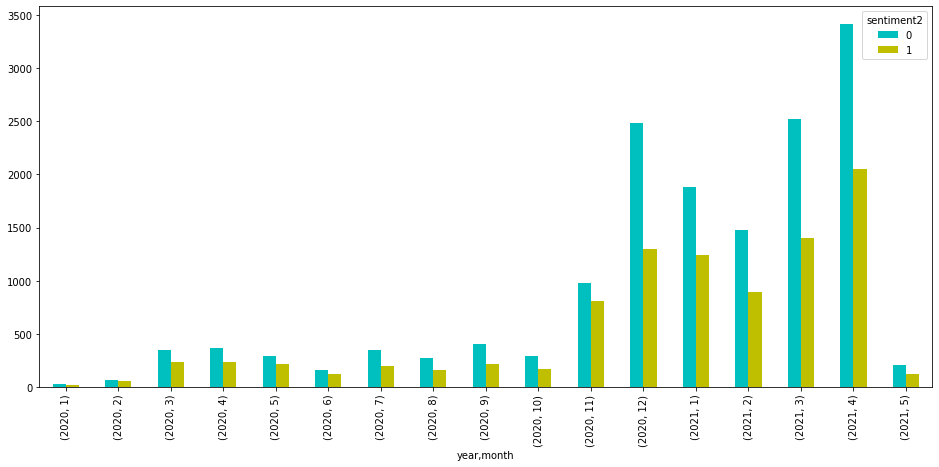

In [133]:
tweets_df_r1.groupby(['year','month','sentiment2']).sentiment2.count().unstack().plot(figsize=(16, 7),kind='bar', legend=True, color=['c', 'y', 'm'])

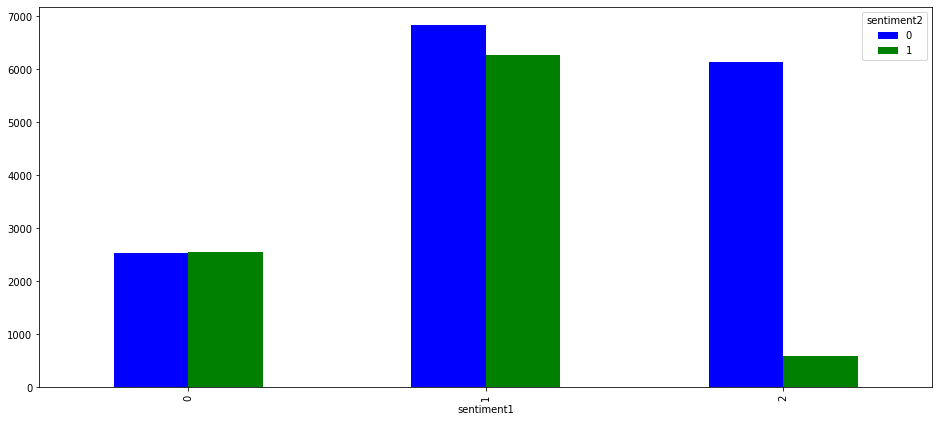

In [134]:
tweets_df_r1.groupby(['sentiment1','sentiment2']).sentiment1.count().unstack().plot(figsize=(16, 7),kind='bar', legend=True, color=['b', 'g', 'r'])

In [50]:
tweets_df_r1.sentiment1.replace({'negative': 0, 'positive': 1, 'neutral':2}, inplace = True)

In [51]:
tweets_df_r1.sentiment2.replace({'objective': 0, 'subjective': 1}, inplace = True)

In [52]:
tweets_df_r1.head()

,date,tweet,month,year,sentiment,polarity,subjectivity,sentiment1,sentiment2
0,2021-05-02,"Know your party platforms! Democrats: Jobs, C...",5,2021,"(0.2, 0.4)",0.200000,0.400000,1,0
1,2021-05-02,CM Mamata Banerjee asks Centre to provide free...,5,2021,"(0.4, 0.8)",0.400000,0.800000,1,1
2,2021-05-02,West Bengal Government needs to be very carefu...,5,2021,"(-0.4183333333333333, 0.7916666666666666)",-0.418333,0.791667,0,1
3,2021-05-02,Crediting Boris Johnson with beating Covid is ...,5,2021,"(-0.06851851851851852, 0.47962962962962963)",-0.068519,0.479630,0,0
4,2021-05-02,I got my second Pfizer vaccine shot. I didn’t ...,5,2021,"(0.0, 0.0)",0.000000,0.000000,2,0


#### Stop words and Corpus

In [117]:
stopwords = list(nltk.corpus.stopwords.words('english'))
new_words=['&amp;',"http","https",'co',"''", '""', '...', '``','@','#',"'","`","http`","http'","t","co","t`","co`",
           '\x89ûï','sxsw\x89û\x9d',"'d","'s","'ll",'//bit.ly/ieavob','&',')','(','“','-','”','*','$',"`","https co",
           "'re","n't",'http','//bit.ly/gvlrin','//j.mp/grn7pk','.',',',':','’','!','?',';','amp','%',"t co","NOT`"]
stopwords.extend(new_words)
print(stopwords) 

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [127]:
corpus=[]
newtt= tweets_df_r1['tweet'].str.split()
newtt=newtt.values.tolist()
corpus=[word for i in newtt for word in i]

from collections import defaultdict
wordcount=defaultdict(int)
for word in corpus:
    if word not in stopwords:
        wordcount[word]+=1

#### Plotting the top 10 stopwords & non stopwords

In [55]:
def plot_top_stopwords_barchart(tweet):
    newtt= tweets_df_r1['tweet'].str.split()
    newtt=newtt.values.tolist()
    corpus=[word for i in newtt for word in i]
    from collections import defaultdict
    dic=defaultdict(int)
    for word in corpus:
        if word in stopwords:
            dic[word]+=1
            
    top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10] 
    x,y=zip(*top)
    plt.bar(x,y)

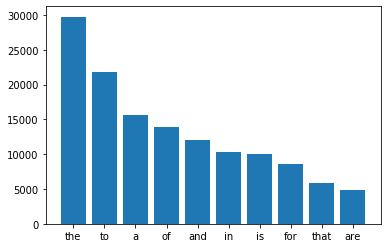

In [56]:
plot_top_stopwords_barchart(tweets_df_r1['tweet']) 

#### Word level Analysis on through counter function
- A Counter is a container that keeps track of how many times equivalent values are added. It can be used to implement the same algorithms for which bag or multiset data structures are commonly used in other languages.

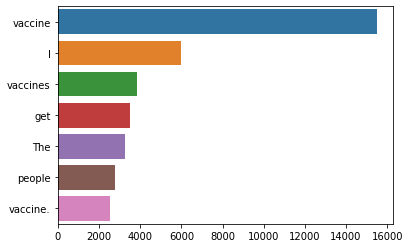

In [57]:
from collections import  Counter
counter=Counter(corpus)
most=counter.most_common()

x, y= [], []
for word,count in most[:40]:
    if (word not in stopwords):
        x.append(word)
        y.append(count)
        
sns.barplot(x=y,y=x)

In [58]:
from collections import  Counter

def plot_top_non_stopwords_barchart(tweet):
  
    newtt= tweets_df_r1['tweet'].str.split()
    newtt=newtt.values.tolist()
    corpus=[word for i in newtt for word in i]

    counter=Counter(corpus)
    most=counter.most_common()
    x, y=[], []
    for word,count in most[:40]:
        if (word not in stopwords):
            x.append(word)
            y.append(count)
            
    sns.barplot(x=y,y=x)

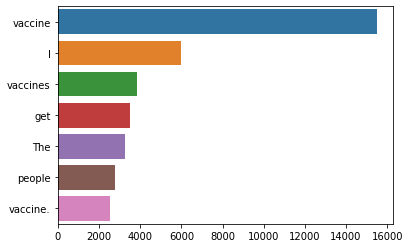

In [59]:
plot_top_non_stopwords_barchart(tweets_df_r1['tweet'])

### Ngram exploration

In [60]:
from nltk.util import ngrams
from sklearn.feature_extraction.text import CountVectorizer
def get_top_ngram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) 
                  for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:10]

In [61]:
def plot_top_ngrams_barchart(tweet, n=2):
      
    newtt= tweets_df_r1['tweet'].str.split()
    newtt=newtt.values.tolist()
    corpus=[word for i in newtt for word in i]


    def _get_top_ngram(corpus, n=None):
        vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
        bag_of_words = vec.transform(corpus)
        sum_words = bag_of_words.sum(axis=0) 
        words_freq = [(word, sum_words[0, idx]) 
                      for word, idx in vec.vocabulary_.items()]
        words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
        return words_freq[:10]
    for word,count in most[:40]:
        if (word not in stopwords):
            x.append(word)
            y.append(count)
        top_n_bigrams=_get_top_ngram(tweet,n)[:10]
        x,y=map(list,zip(*top_n_bigrams))
        sns.barplot(x=y,y=x)

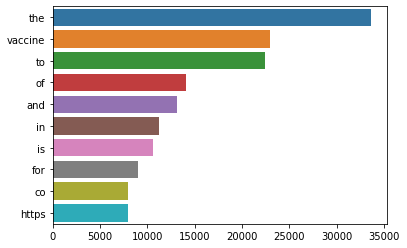

In [62]:
plot_top_ngrams_barchart(tweets_df_r1['tweet'],1)

#### Top N Bigram

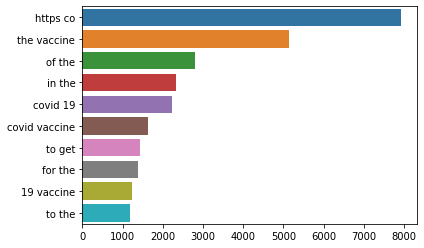

In [63]:
plot_top_ngrams_barchart(tweets_df_r1['tweet'],2)

#### Top N Trigram

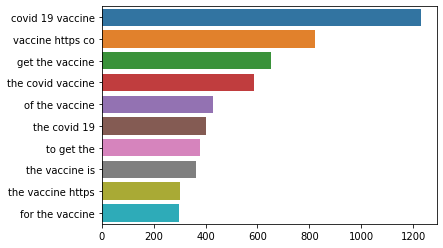

In [64]:
plot_top_ngrams_barchart(tweets_df_r1['tweet'],3) 

#### Top N Quadgram

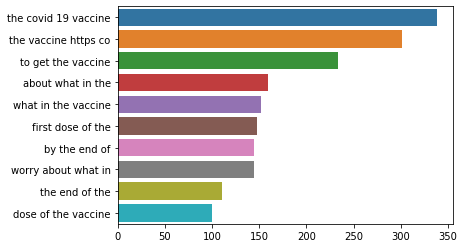

In [65]:
plot_top_ngrams_barchart(tweets_df_r1['tweet'],4)  

In [66]:
tweets_df_r1.head()

,date,tweet,month,year,sentiment,polarity,subjectivity,sentiment1,sentiment2
0,2021-05-02,"Know your party platforms! Democrats: Jobs, C...",5,2021,"(0.2, 0.4)",0.200000,0.400000,1,0
1,2021-05-02,CM Mamata Banerjee asks Centre to provide free...,5,2021,"(0.4, 0.8)",0.400000,0.800000,1,1
2,2021-05-02,West Bengal Government needs to be very carefu...,5,2021,"(-0.4183333333333333, 0.7916666666666666)",-0.418333,0.791667,0,1
3,2021-05-02,Crediting Boris Johnson with beating Covid is ...,5,2021,"(-0.06851851851851852, 0.47962962962962963)",-0.068519,0.479630,0,0
4,2021-05-02,I got my second Pfizer vaccine shot. I didn’t ...,5,2021,"(0.0, 0.0)",0.000000,0.000000,2,0


#### Creating Subset

In [67]:
subset = ['tweet','sentiment1']
tweets_df_r2 = tweets_df_r1.loc[:, subset] 
tweets_df_r2.head() 

,tweet,sentiment1
0,"Know your party platforms! Democrats: Jobs, C...",1
1,CM Mamata Banerjee asks Centre to provide free...,1
2,West Bengal Government needs to be very carefu...,0
3,Crediting Boris Johnson with beating Covid is ...,0
4,I got my second Pfizer vaccine shot. I didn’t ...,2


In [68]:
tweets_df_r2.sentiment1.value_counts()

1    13100
2     6736
0     5098
Name: sentiment1, dtype: int64

##### Setting Target Variable

In [87]:
data = tweets_df_r2.tweet
target = tweets_df_r2.sentiment1

##### removing the stopwords and tokenizing 

In [69]:
## tokenize tweets and remove stopwords
def process_tweet(tweet):
    tokens = nltk.word_tokenize(tweet)
    stopwords_removed = [token.lower() for token in tokens if token.lower() not in stopwords]
    return stopwords_removed

In [70]:
processed_tweet = list(map(process_tweet,tweets_df_r2.tweet)) 

In [71]:
processed_tweet 

[['know',
  'party',
  'platforms',
  'democrats',
  'jobs',
  'checks',
  'covid',
  'relief',
  'vaccines',
  'universal',
  'healthcare',
  'free',
  'education',
  'infrastructure',
  'republicans',
  'insurrection',
  'voter',
  'suppression',
  'dr.',
  'seuss',
  'mr',
  'potato',
  'head',
  'hunter',
  'biden',
  'sex',
  'trafficking',
  'planks',
  'wood',
  'dandelions'],
 ['cm',
  'mamata',
  'banerjee',
  'asks',
  'centre',
  'provide',
  'free',
  'vaccine',
  'every',
  'indian',
  'says',
  'sit',
  'protest',
  'otherwise'],
 ['west',
  'bengal',
  'government',
  'needs',
  'careful',
  'surge',
  'covid',
  'cases',
  'due',
  'election',
  'rallies',
  'started',
  'rubbed',
  'narendra',
  'modi',
  'nose',
  'ground',
  'centre',
  'play',
  'worst',
  'politics',
  'supply',
  'oxygen',
  'vaccines',
  'medicines'],
 ['crediting',
  'boris',
  'johnson',
  'beating',
  'covid',
  'akin',
  'awarding',
  'nobel',
  'peace',
  'prize',
  'vlad',
  'impaler',
  'v

In [72]:
tweet_concat = []
for tweet in processed_tweet:
    tweet_concat += tweet 

In [73]:
tweet_freqdist = FreqDist(tweet_concat)
tweet_freqdist.most_common(260) 

[('vaccine', 22530),
 ('vaccines', 6017),
 ('get', 3766),
 ('covid', 3683),
 ('people', 3529),
 ('covid-19', 2164),
 ('first', 2038),
 ('trump', 1840),
 ('us', 1802),
 ('one', 1800),
 ('coronavirus', 1549),
 ('pfizer', 1496),
 ('today', 1483),
 ('got', 1401),
 ('like', 1371),
 ('doses', 1357),
 ('would', 1346),
 ('take', 1346),
 ('million', 1297),
 ('need', 1282),
 ('getting', 1238),
 ('new', 1218),
 ('biden', 1204),
 ('india', 1156),
 ('vaccinated', 1116),
 ('covid19', 1081),
 ('virus', 1029),
 ('dose', 1003),
 ('health', 995),
 ('want', 965),
 ('know', 951),
 ('government', 950),
 ('time', 947),
 ('make', 946),
 ('year', 940),
 ('says', 911),
 ('president', 904),
 ('news', 893),
 ('world', 884),
 ('1', 876),
 ('going', 876),
 ('pandemic', 874),
 ('still', 863),
 ('effective', 861),
 ('day', 846),
 ('everyone', 806),
 ('even', 802),
 ('said', 798),
 ('every', 793),
 ('safe', 789),
 ('work', 769),
 ('go', 741),
 ('could', 738),
 ('uk', 734),
 ('free', 717),
 ('let', 709),
 ('good', 708

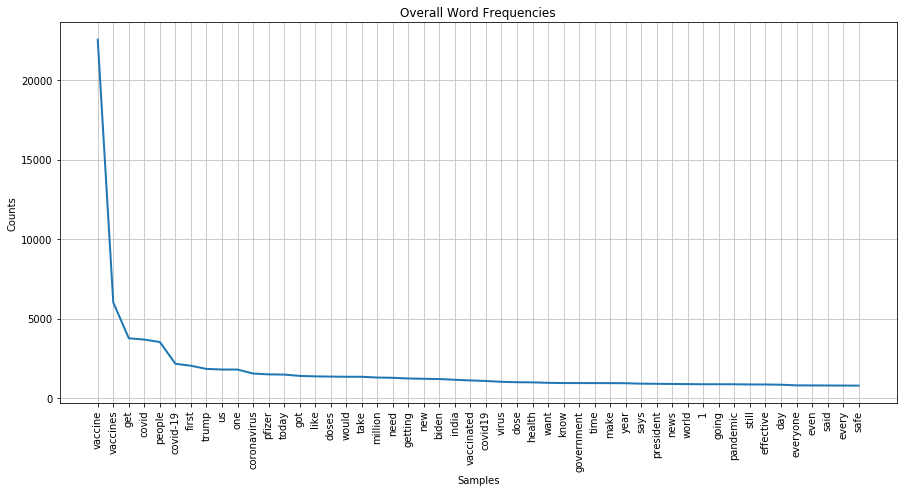

In [135]:
plt.figure(figsize=(15,7))
plt.title('Overall Word Frequencies')
tweet_freqdist.plot(50)

In [168]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')

def preprocess_tweet(tweets_df_r2):
    corpus=[]
    stem=PorterStemmer()
    lem=WordNetLemmatizer()
    for tweet in tweets_df_r2['tweet']:
        words=[w.strip("`'").lower() for w in word_tokenize(tweet) if (w not in stopwords)]
        
        words=[lem.lemmatize(w) for w in words if len(w)>2]
        
        corpus.extend(words)
    return corpus

corpus1=preprocess_tweet(tweets_df_r2)   

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [158]:
wordcount 

defaultdict(int,
            {'Know': 10,
             'party': 66,
             'platforms!': 1,
             'Democrats:': 10,
             'Jobs,': 2,
             'Checks,': 1,
             'Covid': 1187,
             'Relief,': 1,
             'Vaccines,': 16,
             'Universal': 7,
             'Healthcare,': 1,
             'Free': 48,
             'Education,': 1,
             'Infrastructure': 7,
             'Republicans:': 11,
             'Insurrection,': 1,
             'Voter': 17,
             'Suppression,': 1,
             'Dr.': 405,
             'Seuss,': 4,
             'Mr.': 33,
             'Potato': 4,
             'Head,': 1,
             'Hunter': 8,
             'Biden,': 26,
             'Sex': 1,
             'Trafficking,': 1,
             'Planks': 1,
             'Wood,': 1,
             'Dandelions': 1,
             'CM': 46,
             'Mamata': 5,
             'Banerjee': 2,
             'asks': 38,
             'Centre': 51,
             'pro

In [169]:
corpus1 

['know',
 'party',
 'platform',
 'democrat',
 'job',
 'check',
 'covid',
 'relief',
 'vaccine',
 'universal',
 'healthcare',
 'free',
 'education',
 'infrastructure',
 'republican',
 'insurrection',
 'voter',
 'suppression',
 'dr.',
 'seuss',
 'potato',
 'head',
 'hunter',
 'biden',
 'sex',
 'trafficking',
 'plank',
 'wood',
 'dandelion',
 'mamata',
 'banerjee',
 'asks',
 'centre',
 'provide',
 'free',
 'vaccine',
 'every',
 'indian',
 'say',
 'sit',
 'protest',
 'otherwise',
 'west',
 'bengal',
 'government',
 'need',
 'careful',
 'the',
 'surge',
 'covid',
 'case',
 'due',
 'election',
 'rally',
 'started',
 'and',
 'rubbed',
 'narendra',
 'modi',
 'nose',
 'ground',
 'centre',
 'play',
 'worst',
 'politics',
 'supply',
 'oxygen',
 'vaccine',
 'medicine',
 'crediting',
 'boris',
 'johnson',
 'beating',
 'covid',
 'akin',
 'awarding',
 'nobel',
 'peace',
 'prize',
 'vlad',
 'impaler',
 'vaccine',
 'rollout',
 'nh',
 'army',
 'medic',
 'volunteer',
 'work',
 'unpaid',
 'concept',
 'who

In [164]:
corpus 

['Know',
 'your',
 'party',
 'platforms!',
 'Democrats:',
 'Jobs,',
 'Checks,',
 'Covid',
 'Relief,',
 'Vaccines,',
 'Universal',
 'Healthcare,',
 'Free',
 'Education,',
 'Infrastructure',
 'Republicans:',
 'Insurrection,',
 'Voter',
 'Suppression,',
 'Dr.',
 'Seuss,',
 'Mr.',
 'Potato',
 'Head,',
 'Hunter',
 'Biden,',
 'Sex',
 'Trafficking,',
 'Planks',
 'of',
 'Wood,',
 'Dandelions',
 'CM',
 'Mamata',
 'Banerjee',
 'asks',
 'Centre',
 'to',
 'provide',
 'free',
 'vaccine',
 'to',
 'every',
 'Indian,',
 'says',
 'will',
 'sit',
 'in',
 'protest',
 'otherwise',
 'West',
 'Bengal',
 'Government',
 'needs',
 'to',
 'be',
 'very',
 'careful',
 'now.',
 'The',
 'surge',
 'in',
 'Covid',
 'cases',
 'due',
 'to',
 'election',
 'rallies',
 'has',
 'started.',
 'And',
 'having',
 'rubbed',
 'Narendra',
 'Modi’s',
 'nose',
 'on',
 'ground,',
 'Centre',
 'will',
 'play',
 'worst',
 'politics',
 'in',
 'supply',
 'of',
 'Oxygen,',
 'Vaccines,',
 'Medicines',
 'Crediting',
 'Boris',
 'Johnson',
 '

In [170]:
# from itertools import count
# factory = lambda c=count(): 0 if next(c) % 2 else []
# superdict = defaultdict(factory)

# from collections import defaultdict
wordcount1=defaultdict(int)
for word in corpus1:
    if word not in stopwords:
        wordcount1[word]+=1


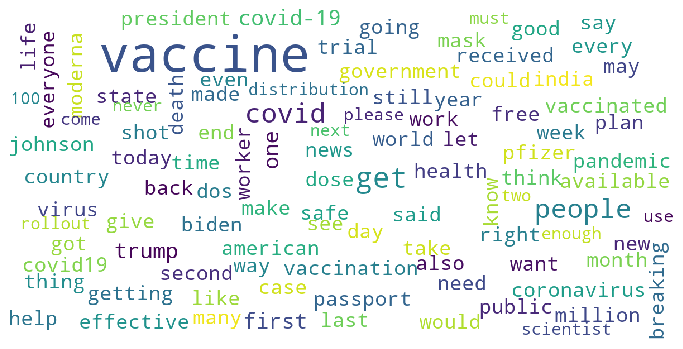

In [171]:
def show_wordcloud(tweet):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=100,
        max_font_size=30,
        scale=3,
        random_state=1)
   
    wordcloud=wordcloud.generate_from_frequencies(tweet)

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(wordcount1) 

#### Bag Of Words using genism & the LDA model: Latent Dirichlet Allocation (LDA)

In [76]:
import gensim
from gensim import corpora
from gensim.utils import simple_preprocess

dic=gensim.corpora.Dictionary(corpus)
bow_corpus = [dic.doc2bow(doc) for doc in corpus]

In [77]:
lda_model = gensim.models.LdaMulticore(bow_corpus, 
                                   num_topics = 4, 
                                   id2word = dic,                                    
                                   passes = 10,
                                   workers = 2)
lda_model.show_topics()

[(0,
  '0.048*"vaccine" + 0.013*"Trump" + 0.012*"coronavirus" + 0.009*"million" + 0.009*"Biden" + 0.008*"dos" + 0.008*"Pfizer" + 0.008*"The" + 0.007*"President" + 0.005*"COVID-19"'),
 (1,
  '0.021*"Vaccine" + 0.010*"vaccine" + 0.003*"Vaccines" + 0.003*"Coronavirus" + 0.003*"Corona" + 0.003*"Virus" + 0.003*"Africa" + 0.002*"ang" + 0.002*"testing" + 0.002*"Deaths"'),
 (2,
  '0.043*"vaccine" + 0.009*"India" + 0.007*"world" + 0.006*"The" + 0.005*"free" + 0.005*"country" + 0.004*"coronavirus" + 0.004*"COVID-19" + 0.004*"This" + 0.004*"pandemic"'),
 (3,
  '0.063*"vaccine" + 0.012*"get" + 0.010*"people" + 0.008*"The" + 0.005*"need" + 0.005*"take" + 0.005*"one" + 0.005*"would" + 0.005*"like" + 0.005*"virus"')]

In [78]:
from pyLDAvis import gensim_models

#### Python LDA visualization through pyLDAvis

In [79]:
import pyLDAvis
import pyLDAvis.sklearn
from gensim.corpora import Dictionary
from gensim.models.coherencemodel import CoherenceModel
from gensim.models.ldamodel import LdaModel
pyLDAvis.enable_notebook() 
vis = gensim_models.prepare(lda_model, bow_corpus, dic)
vis

C:\Users\DELL\anaconda3\envs\learn-env\lib\site-packages\joblib\numpy_pickle.py:104: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  pickler.file_handle.write(chunk.tostring('C'))
C:\Users\DELL\anaconda3\envs\learn-env\lib\site-packages\joblib\numpy_pickle.py:104: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  pickler.file_handle.write(chunk.tostring('C'))


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3      0.156815  0.098687       1        1  58.518183
0      0.081945 -0.163574       2        1  19.935860
2      0.021973  0.052517       3        1  14.712401
1     -0.260734  0.012371       4        1   6.833556, topic_info=         Term          Freq         Total Category  logprob  loglift
41    vaccine  23668.000000  23668.000000  Default  30.0000  30.0000
75    Vaccine    998.000000    998.000000  Default  29.0000  29.0000
775     Trump   2296.000000   2296.000000  Default  28.0000  28.0000
119   million   1118.000000   1118.000000  Default  27.0000  27.0000
0       Biden    795.000000    795.000000  Default  26.0000  26.0000
...       ...           ...           ...      ...      ...      ...
465   VACCINE     37.703416    286.022784   Topic4  -6.6897   0.6570
2076   Israel     32.779440    113.378889   Topic4  -6.8296   1.4424
49        The     41.972766   3145.152866   Topic4  -6.5824  -1.6333
2       Covid     37.589519    939.616890   Topic4  -6.6927  -0.5354
1184      For     32.940056    303.468280   Topic4  -6.8247   0.4627

[296 rows x 6 columns], token_table=       Topic      Freq  Term
term                        
910        1  0.400987   100
910        2  0.597215   100
3918       3  0.981757  1955
2434       2  0.978847   200
5629       2  0.989442   300
...      ...       ...   ...
2232       4  0.977556   में
10627      4  0.980530   रहा
3834       4  0.972904   हैं
50695      4  0.977323   ┳┻|
50697      4  0.977323   ┻┳|

[525 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 1, 3, 2])

#### Wordcloud

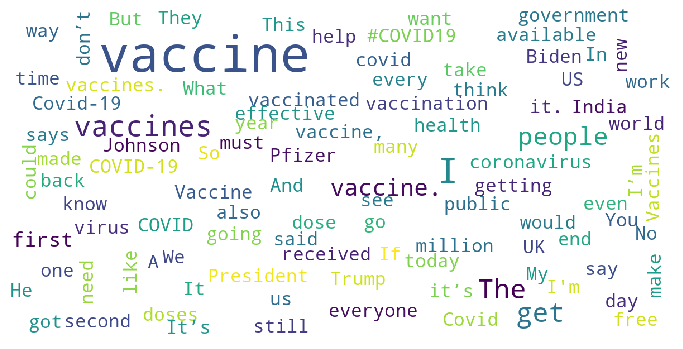

In [128]:
from wordcloud import WordCloud
#stopwords = set(STOPWORDS)

def show_wordcloud(tweet):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=100,
        max_font_size=30,
        scale=3,
        random_state=1)
   
    wordcloud=wordcloud.generate_from_frequencies(tweet)

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(wordcount) 

In [122]:
dic 

In [124]:
np.array(corpus).flatten()  

C:\Users\DELL\anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  """Entry point for launching an IPython kernel.


array([list(['know', 'party', 'platform', 'democrat', 'job', 'check', 'covid', 'relief', 'vaccine', 'universal', 'healthcare', 'free', 'education', 'infrastructure', 'republican', 'insurrection', 'voter', 'suppression', 'dr.', 'seuss', 'potato', 'head', 'hunter', 'biden', 'sex', 'trafficking', 'plank', 'wood', 'dandelion']),
       list(['mamata', 'banerjee', 'asks', 'centre', 'provide', 'free', 'vaccine', 'every', 'indian', 'say', 'sit', 'protest', 'otherwise']),
       list(['west', 'bengal', 'government', 'need', 'careful', 'the', 'surge', 'covid', 'case', 'due', 'election', 'rally', 'started', 'and', 'rubbed', 'narendra', 'modi', 'nose', 'ground', 'centre', 'play', 'worst', 'politics', 'supply', 'oxygen', 'vaccine', 'medicine']),
       ...,
       list(['wapo', 'run', 'editorial', 'lamenting', 'rise', 'polio', 'pakistan', 'mistrust', 'among', 'population', 'aid', 'worker', 'without', 'noting', 'role', 'cia', 'creating', 'mistrust', 'creating', 'fake', 'vaccine', 'program', 'track'

#### Lemmantizing data 

In [88]:
from nltk.stem import WordNetLemmatizer 
lemmatizer = WordNetLemmatizer() 
lemmatized_output = []

for listy in processed_tweet:
    lemmed = ' '.join([lemmatizer.lemmatize(w) for w in listy])
    lemmatized_output.append(lemmed)

In [89]:
Data = {'tweet':lemmatized_output, 'sentiment1':target}
tweet_lemmantized = pd.DataFrame(Data)

In [90]:
tweet_lemmantized.to_csv('tweet_lemmantized.csv', index=False)

### Spliting into training and testing data sets

In [91]:
train_tweets = tweet_lemmantized.sample(frac = 0.75)

In [92]:
test_tweets = tweet_lemmantized.drop(train_tweets.index) 

In [93]:
train_tweets.shape

(18700, 2)

In [94]:
test_tweets.shape 

(6234, 2)

In [95]:
train_tweets.to_csv('train_data1.csv',index=False)  

In [96]:
test_tweets.to_csv('test_data1.csv',index=False)   

### StratifiedShuffleSplit

In [102]:
from sklearn.model_selection import StratifiedShuffleSplit
sss = StratifiedShuffleSplit(n_splits = 1, test_size = .25, random_state = 3)
sss.get_n_splits(tweet_lemmantized.tweet, tweet_lemmantized.sentiment1)
for train_ind, test_ind in sss.split(tweet_lemmantized.tweet, tweet_lemmantized.sentiment1):
    pass
print(f'Train_ind shape: {train_ind.shape}\nTest_ind shape: {test_ind.shape}')

Train_ind shape: (18700,)
Test_ind shape: (6234,)


#### tfidf vectorizing

In [106]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(analyzer = 'word', max_features = 30000)
X_train = vectorizer.fit_transform(tweet_lemmantized.tweet[train_ind].reset_index(drop = True))
y_train = tweet_lemmantized.sentiment1[train_ind].reset_index(drop = True)
X_test = vectorizer.transform(tweet_lemmantized.tweet[test_ind].reset_index(drop = True))
y_test = tweet_lemmantized.sentiment1[test_ind].reset_index(drop = True)

### Model Evaluation

In [107]:
model_perf = {} # dictionary for storing performance

#### Logistic Regression

In [109]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
# grid searching for optimal c values
params = {'C': [.001, .005, .01, .05, .1, .5, 1, 5]}
model = LogisticRegression(max_iter = 1000, random_state = 4)
clf = GridSearchCV(model, param_grid = params, n_jobs = -1)
clf.fit(X_train, y_train)
clf.cv_results_

C:\Users\DELL\anaconda3\envs\learn-env\lib\site-packages\joblib\numpy_pickle.py:104: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  pickler.file_handle.write(chunk.tostring('C'))
C:\Users\DELL\anaconda3\envs\learn-env\lib\site-packages\joblib\numpy_pickle.py:104: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  pickler.file_handle.write(chunk.tostring('C'))


{'mean_fit_time': array([ 0.6998704 ,  0.9592495 ,  1.06559172,  2.07221293,  2.90173593,
         6.22443371,  8.28445268, 11.62254267]),
 'std_fit_time': array([0.02499537, 0.06271492, 0.11918674, 0.0798301 , 0.22839281,
        0.88032696, 1.005886  , 2.29636306]),
 'mean_score_time': array([0.00459895, 0.00479836, 0.00599642, 0.00439811, 0.00539818,
        0.00599627, 0.00619941, 0.00459332]),
 'std_score_time': array([0.00135605, 0.00116572, 0.0008957 , 0.00080127, 0.00101982,
        0.00154828, 0.00203819, 0.00174737]),
 'param_C': masked_array(data=[0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5],
              mask=[False, False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'C': 0.001},
  {'C': 0.005},
  {'C': 0.01},
  {'C': 0.05},
  {'C': 0.1},
  {'C': 0.5},
  {'C': 1},
  {'C': 5}],
 'split0_test_score': array([0.52540107, 0.52540107, 0.52540107, 0.55187166, 0.60855615,
        0.73823529, 0.76229947, 0.79117647]),
 's

#### Observation
- The last five model fits (cross validation for C = 10) did not converge completely

#### GridSearch Visualization

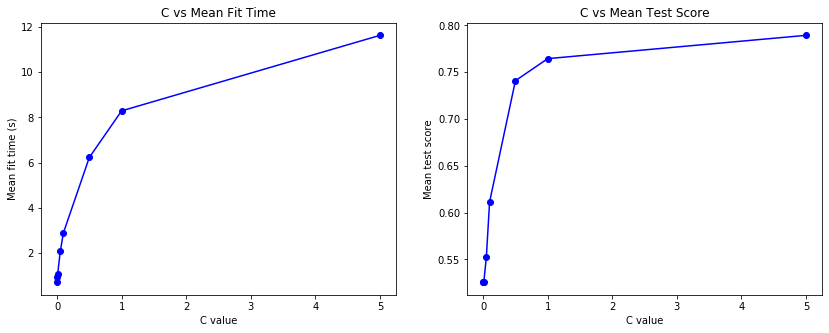

In [110]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(14, 5)
ax1.plot(params['C'], clf.cv_results_['mean_fit_time'], 'b-o')
ax1.set_xlabel('C value')
ax1.set_ylabel('Mean fit time (s)')
ax1.set_title('C vs Mean Fit Time')
ax2.plot(params['C'], clf.cv_results_['mean_test_score'], 'b-o')
ax2.set_xlabel('C value')
ax2.set_ylabel('Mean test score')
ax2.set_title('C vs Mean Test Score')
plt.show()

#### Observation
- C values greater than 1 start to straighten in accuracy, along with longer fit times.

Test accuracy = 0.7762271414821944
 Train accuracy = 0.9078074866310161


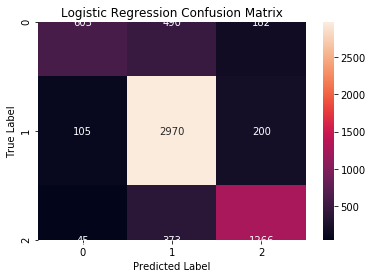

Fit time: 35.869982957839966
Predict time: 0.1471843719482422


In [174]:
import time 
from sklearn.metrics import confusion_matrix
# C = clf.best_params_[]
model = LogisticRegression(C = 1, max_iter = 1000, random_state = 4)
t1 = time.time()
model.fit(X_train, y_train)
t2 = time.time()
y_pred = model.predict(X_test)
train_pred =model.predict(X_train)
t3 = time.time()
acc = np.sum(y_pred == y_test)/y_pred.shape[0]
acc1 = np.sum(train_pred == y_train)/train_pred.shape[0]
fit_time = t2 - t1
pred_time = t3 - t2
c_mat = confusion_matrix(y_test, y_pred)
model_perf['LogisticRegression'] = (acc, c_mat, (fit_time, pred_time))
print(f'Test accuracy = {acc}')
print(f' Train accuracy = {acc1}')
sns.heatmap(c_mat, annot = True, fmt = 'd')
plt.title('Logistic Regression Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()
print(f'Fit time: {fit_time}\nPredict time: {pred_time}')


### Multinomial Naive Bayes

#### grid search for optimal alpha variable

In [137]:
from sklearn.naive_bayes import MultinomialNB
params = {'alpha': np.linspace(0, 200)}
model = MultinomialNB()
clf = GridSearchCV(model, params, n_jobs = -1)
clf.fit(X_train, y_train) 

C:\Users\DELL\anaconda3\envs\learn-env\lib\site-packages\joblib\numpy_pickle.py:104: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  pickler.file_handle.write(chunk.tostring('C'))
C:\Users\DELL\anaconda3\envs\learn-env\lib\site-packages\joblib\numpy_pickle.py:104: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  pickler.file_handle.write(chunk.tostring('C'))
C:\Users\DELL\anaconda3\envs\learn-env\lib\site-packages\sklearn\naive_bayes.py:509: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


GridSearchCV(estimator=MultinomialNB(), n_jobs=-1,
             param_grid={'alpha': array([  0.        ,   4.08163265,   8.16326531,  12.24489796,
        16.32653061,  20.40816327,  24.48979592,  28.57142857,
        32.65306122,  36.73469388,  40.81632653,  44.89795918,
        48.97959184,  53.06122449,  57.14285714,  61.2244898 ,
        65.30612245,  69.3877551 ,  73.46938776,  77.55102041,
        81.63265306,  85.71428571,  89.79591837,  93.87755102,
        97.95918367, 102.04081633, 106.12244898, 110.20408163,
       114.28571429, 118.36734694, 122.44897959, 126.53061224,
       130.6122449 , 134.69387755, 138.7755102 , 142.85714286,
       146.93877551, 151.02040816, 155.10204082, 159.18367347,
       163.26530612, 167.34693878, 171.42857143, 175.51020408,
       179.59183673, 183.67346939, 187.75510204, 191.83673469,
       195.91836735, 200.        ])})

#### best parameter value and score

In [138]:
print(f'Optimal alpha: {clf.best_params_}, score: {clf.best_score_}')

Optimal alpha: {'alpha': 0.0}, score: 0.6120320855614974


#### visualizing gridsearch results

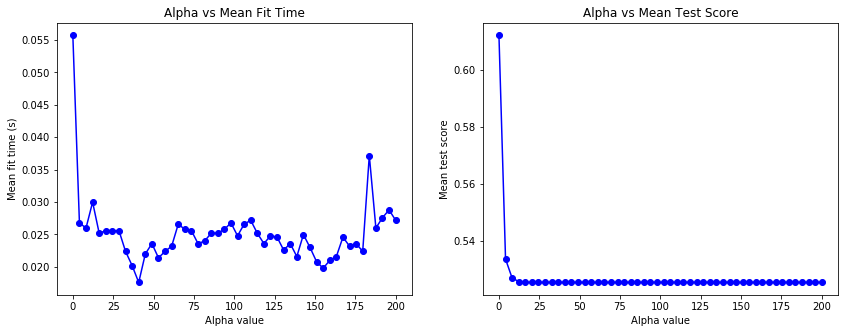

In [139]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(14, 5)
ax1.plot(params['alpha'], clf.cv_results_['mean_fit_time'], 'b-o')
ax1.set_xlabel('Alpha value')
ax1.set_ylabel('Mean fit time (s)')
ax1.set_title('Alpha vs Mean Fit Time')
ax2.plot(params['alpha'], clf.cv_results_['mean_test_score'], 'b-o')
ax2.set_xlabel('Alpha value')
ax2.set_ylabel('Mean test score')
ax2.set_title('Alpha vs Mean Test Score')
plt.show() 

##### The optimal alpha value among those GridSearched was ~0.0, with an accuracy of 61.20%.

#### storing model time, accuracy, and confusion matrix

C:\Users\DELL\anaconda3\envs\learn-env\lib\site-packages\sklearn\naive_bayes.py:509: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


Test accuracy = 0.6013795316008983


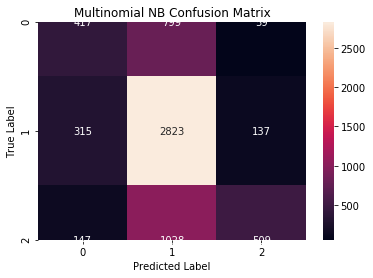

Fit time: 0.012993574142456055
Predict time: 0.002000570297241211


In [140]:
alpha = clf.best_params_['alpha']
model = MultinomialNB(alpha = alpha)
t1 = time.time()
model.fit(X_train, y_train)
t2 = time.time()
y_pred = model.predict(X_test)
t3 = time.time()
acc = np.sum(y_pred == y_test)/y_pred.shape[0]
fit_time = t2 - t1
pred_time = t3 - t2
c_mat = confusion_matrix(y_test, y_pred)
model_perf['MultinomialNB'] = (acc, c_mat, (fit_time, pred_time))
print(f'Test accuracy = {acc}')
sns.heatmap(c_mat, annot = True, fmt = 'd')
plt.title('Multinomial NB Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()
print(f'Fit time: {fit_time}\nPredict time: {pred_time}') 
